In [1]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

### Cifar 10

In [33]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#convert data into one hot vector
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10) 

#data augmentation 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True,
                                                          validation_split=0.2)

#normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train - x_train.mean()
x_test = x_test - x_test.mean()

datagen.fit(x_train)

input_shape = x_train.shape[1:]
output_size = 10

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(output_size, activation='softmax'))

In [ ]:
model.summary()

In [35]:
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), 
                    validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),epochs=100)

Epoch 1/100
625/625 [==============================] - 21s 34ms/step - loss: 1.9224 - accuracy: 0.2840 - val_loss: 1.5791 - val_accuracy: 0.4147
Epoch 2/100
625/625 [==============================] - 22s 35ms/step - loss: 1.5325 - accuracy: 0.4401 - val_loss: 1.4154 - val_accuracy: 0.4848
Epoch 3/100
625/625 [==============================] - 21s 33ms/step - loss: 1.3858 - accuracy: 0.4982 - val_loss: 1.3087 - val_accuracy: 0.5262
Epoch 4/100
625/625 [==============================] - 21s 33ms/step - loss: 1.3027 - accuracy: 0.5327 - val_loss: 1.3327 - val_accuracy: 0.5292
Epoch 5/100
625/625 [==============================] - 21s 33ms/step - loss: 1.2590 - accuracy: 0.5531 - val_loss: 1.1915 - val_accuracy: 0.5716
Epoch 6/100
625/625 [==============================] - 21s 33ms/step - loss: 1.1860 - accuracy: 0.5773 - val_loss: 1.1600 - val_accuracy: 0.5844
Epoch 7/100
625/625 [==============================] - 21s 34ms/step - loss: 1.1461 - accuracy: 0.5955 - val_loss: 1.1392 - val_ac

In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6536 - accuracy: 0.7792


[0.6535900831222534, 0.77920001745224]

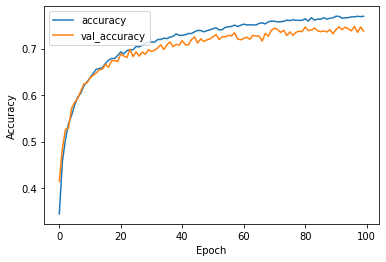

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

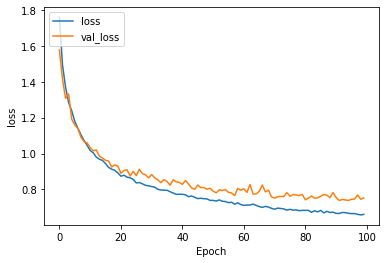

In [39]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')

### Cifar 100

In [26]:
cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#convert data into one hot vector
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100) 

#data augmentation 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True,
                                                          validation_split=0.2)

#normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train - x_train.mean()
x_test = x_test - x_test.mean()

datagen.fit(x_train)

input_shape = x_train.shape[1:]
output_size = 100

In [30]:
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), 
                    validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),epochs=100)

Epoch 1/100
625/625 [==============================] - 23s 36ms/step - loss: 2.9462 - accuracy: 0.2634 - val_loss: 2.9979 - val_accuracy: 0.2545
Epoch 2/100
625/625 [==============================] - 23s 36ms/step - loss: 2.9029 - accuracy: 0.2760 - val_loss: 2.9912 - val_accuracy: 0.2538
Epoch 3/100
625/625 [==============================] - 22s 36ms/step - loss: 2.8778 - accuracy: 0.2787 - val_loss: 2.9414 - val_accuracy: 0.2684
Epoch 4/100
625/625 [==============================] - 22s 35ms/step - loss: 2.8458 - accuracy: 0.2809 - val_loss: 2.9301 - val_accuracy: 0.2697
Epoch 5/100
625/625 [==============================] - 22s 35ms/step - loss: 2.8180 - accuracy: 0.2872 - val_loss: 2.8743 - val_accuracy: 0.2811
Epoch 6/100
625/625 [==============================] - 22s 36ms/step - loss: 2.7953 - accuracy: 0.2890 - val_loss: 2.8748 - val_accuracy: 0.2825
Epoch 7/100
625/625 [==============================] - 22s 36ms/step - loss: 2.7755 - accuracy: 0.2988 - val_loss: 2.9077 - val_ac

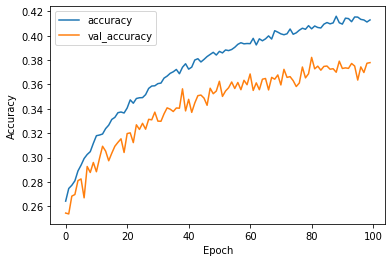

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

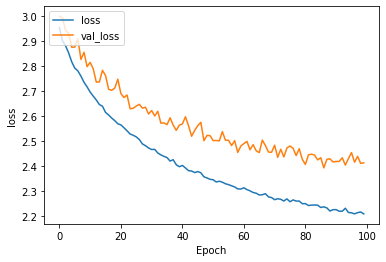

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')